In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
worldcup = pd.read_csv('./WorldCups.csv')

# 데이터프레임의 크기를 확인합니다.
print(worldcup.shape)

# 데이터프레임 상위 5개 값 확인
worldcup.head()

(20, 10)


,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


- 데이터셋의 각 컬럼에 대한 설명은 다음과 같습니다.


변수명 | 의미 | 예시
- | - | -
Year | 개최 연도 | 1930
Country | 개최 국가 | Uruguay
Winner | 우승 국가 | Uruguay
Runners-Up | 준우승 국가 | Argentina
Third | 3위 국가 | USA
Fourth | 4위 국가 | Yugoslavia
GoalsScored | 총 득점 수 | 70
QualifiedTeams | 참가 국가 수 | 13
MatchesPlayed | 총 경기 수 | 18
Attendance | 총 관중 | 590549

In [7]:
# info 확인하기
worldcup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


- object는 문자열 데이터를, int64는 정수형 데이터를 나타냅니다.
- 정수형이어야 할 Attendance 컬럼이 object로 저장되어 있으므로, 이를 처리해줘야 할 것으로 보입니다.

In [8]:
# astype 함수를 활용하여 Attendance 값름 int형으로 변환
worldcup['Attendance'] = worldcup['Attendance'].astypeype('int64')

AttributeError: 'Series' object has no attribute 'astypeype'

- 590.549 를 int형으로 변환할 수 없다는 내용의 에러가 발생합니다.
- 이는 . 문자로 인해 일어난 것으로, 가운데에 있는 .을 없애주도록 하겠습니다.

In [9]:
def make_int(i):
    i = i.replace('.', "")
    return i

In [10]:
make_int('330.33')

'33033'

In [11]:
worldcup['Attendance'] = worldcup['Attendance'].apply(make_int)
worldcup['Attendance'] = worldcup['Attendance'].astype('int64')
worldcup.head(10)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1563135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1603975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1865753


In [12]:
worldcup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     int64 
dtypes: int64(5), object(5)
memory usage: 1.7+ KB


## 경기당 득점 수 확인하기

In [13]:
worldcup['Goals_per_Match'] = worldcup['GoalsScored'] / worldcup["MatchesPlayed"]
worldcup

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,Goals_per_Match
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549,3.888889
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000,4.117647
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700,4.666667
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246,4.000000
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607,5.384615
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819810,3.600000
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172,2.781250
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1563135,2.781250
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1603975,2.968750
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1865753,2.552632


## 그래프로 확실하게 알아보기

(1) 전체 관중수, 경기수 그래프 그려보기

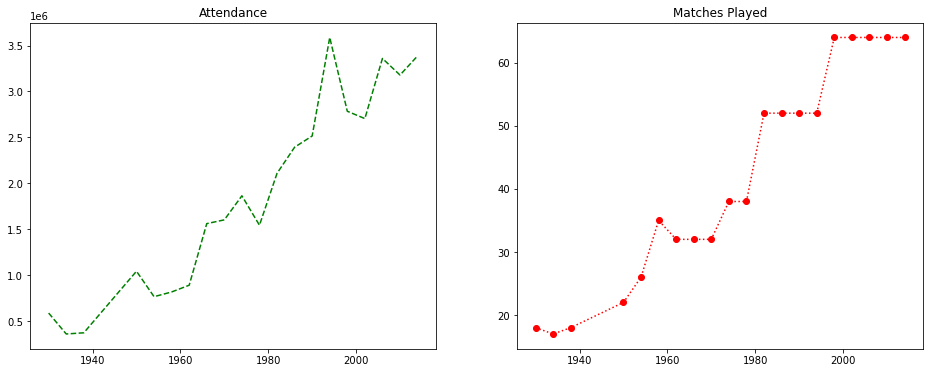

In [14]:
# 그래프 사이즈 설정
plt.figure(figsize = (16, 6))

# 한 번에 두개를 그리고 싶다면 subplot을 활용하면 됨
# 그리고자 하는 그래프들을 행(row = x축), 열(column = y축)로 배열할 때,
# subplot(row, column, order) 순서대로 숫자를 입력하면 됨.

plt.subplot(121)
plt.plot("Year","Attendance", "g--" , data = worldcup)
plt.title("Attendance")

plt.subplot(122)
plt.plot("Year", "MatchesPlayed", "ro:" , data = worldcup)
plt.title("Matches Played")

plt.show()

- 연도가 지남에 따라 전체 관중의 수와 경기 수가 늘어난 것을 데이터 시각화를 한 눈에 확인할 수 있습니다. 

### (2)  전체 득점 수, 전체 매치 수, 매치 당 골 수 그래프 그려보기

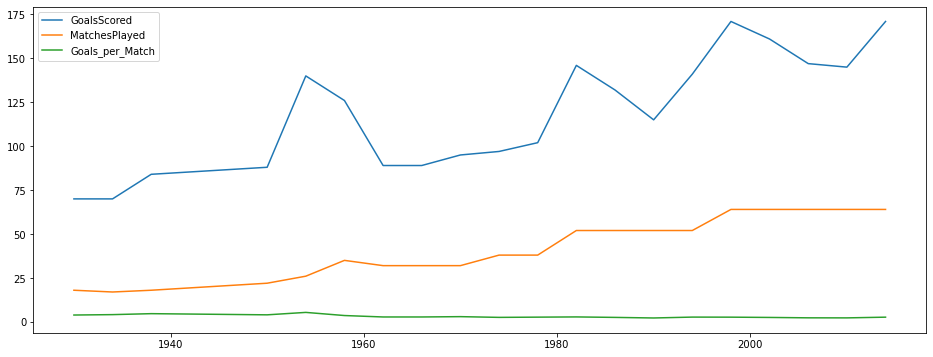

In [15]:
plt.figure(figsize=(16, 6))

plt.plot("Year", "GoalsScored", data=worldcup)
plt.plot("Year", "MatchesPlayed", data=worldcup)
plt.plot("Year", "Goals_per_Match", data=worldcup)

plt.legend()
plt.show()

# 월드컵 매치 데이터

- **월드컵 매치 데이터셋**이란?
월드컵 매치 데이터셋은 매 회 이루어진 월드컵 경기에 대한 정보를 담고 있습니다. 특히 한 회에 많은 수의 경기가 이루어지기 때문에 위에서 살펴본 기본 월드컵 데이터보다 훨씬 많은 데이터가 담겨있습니다.

In [16]:
match = pd.read_csv(".\WorldCupMatches.csv")

print(match.shape)

match.head()

(4572, 20)


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


- 데이터셋의 각 컬럼에 대한 설명은 다음과 같습니다.


변수명 | 의미 | 예시
- | - | -
Year | 경기가 진행된 연도 | 1930
Datetime | 경기 시작 시간 | 13 Jul 1930 - 15:00
Stage | 스테이지(조별리그, 16강, 8강 등) | Group 1
Stadium | 경기장 | Pocitos
City | 도시 | Montevideo
Home Team Name | 홈 팀 국가 이름 | France
Home Team Goals | 홈 팀 득점 수 | 4	
Away Team Goals | 원정 팀 득점 수 | 1
Away Team Name | 원정 팀 국가 이름 | Mexico
Win conditions | 승리 상황  | Italy win after extra time
Attendance | 관중 수 | 4444
Half-time Home Goals | 홈 팀 전반전 득점 수 | 3
Half-time Away Goals | 원정 팀 전반전 득점 수 | 0
Referee | 주심의 이름 | LOMBARDI Domingo (URU)	
Assistant 1 | 제 1 부심(선심)의 이름 | CRISTOPHE Henry (BEL)	
Assistant 2 | 제 2 부심(선심)의 이름 | REGO Gilberto (BRA)	
RoundID | 라운드의 고유 ID | 201
MatchID | 경기의 고유 ID | 1096
Home Team Initials | 홈 팀의 세 글자 이니셜 | FRA
Away Team Initials | 원정 팀의 세 글자 이니셜 | MEX

### 데이터 전처리

In [17]:
# info 확인
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

## 결측치( 빈 데이터 )

- 결측치란 NA(Not Available)라고도 하는데, 원래 정상적으로 데이터가 있어야 하지만 없음을 뜻합니다
- pandas 함수는 결측치가 있다면 함수 또는 연산이 작동하지 않음.
- 결측치는 isnull() 함수로 확인해 볼 수 있다.

In [18]:
match.isnull().head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


- `isnull()` 함수를 그냥 사용하면 위와 같이 비어있지 않고 어떤 값이든 들어있다면 False, 값이 없어 비어있다면 True로 표시가 됩니다.
- 하지만, 이렇게는 여전히 한 번에 볼 수 없습니다. 따라서 `isnull()` 뒤에 `sum()` 함수를 추가로 붙여주어 결측치의 개수를 확인해보겠습니다.


In [25]:
# 전체 컬럼별 결측치 개수 확인하기
match.isnull().sum()
# 컬럼 별 확인

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              0
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

In [20]:
# 총 결측치 개수 확인하기
match.isnull().sum().sum()

74402

- sum() 함수가 컬럼별로 (axis=0) 연산되었기 때문에 Series 형태로 보여지게 되었습니다.
- 여기에 sum()을 한 번 더 사용하면 전체 데이터프레임의 결측치 총 개수를 확인할 수 있습니다.

- 결측치의 총 개수가 74402개나 존재합니다. 그런데 독특한 패턴을 확인할 수 있습니다. 
- 바로 각 컬럼 별로 3720개라는 동일한 수의 결측값들이 존재한다는 것인데요, `isnull` 함수에 axis인자를 1로 설정하여 컬럼 별이 아니라 이번에는 행 별로 결측치 개수를 한번 확인해보겠습니다. 

In [24]:
match.isnull().sum(axis=1)
# 행별 확인

0      0
1      0
2      0
3      0
4      0
      ..
847    0
848    0
849    0
850    0
851    0
Length: 850, dtype: int64

- 위에 있는 행에서는 결측치가 한 개도 없었는데, 아래 행들에는 모두 20개의 결측치가 존재하는 것을 확인하였습니다. 
- 그런데 여기서 우리가 생각해봐야 하는 것은 바로 컬럼의 개수입니다. 이번 매치 데이터셋에는 총 20개의 컬럼이 있었는데, 한 행의 결측치 개수가 그와 동일한 20개이다..?
- 맞습니다. 이것은 바로 그 행이 모두 비어있는 값이라는 것을 의미합니다.
- 이렇게 비어 있는 행은 아무런 정보도 가지고 있지 않기 때문에 제거해주는 것이 좋습니다. 
- 그러나 결측치가 있다고 하여 해당 행을 무조건 제거하는 것은 의미있는 정보를 손실하는 위험성도 존재하기 때문에 우리는 항상 결측치를 제거하기 이전 위와 같이 여러 방향으로 확인해보는 것이 좋습니다.

- null값이 있는 행을 지우고 싶을 때에는 `dropna`를 활용하면 편리하게 지울 수 있습니다.

In [22]:
# dropna를 활용하여 null 값이 있는 행 지우기
match = match.dropna()
print(match.shape)

(850, 20)


In [23]:
match.isnull().sum().sum()

0

##### 결측치 제거 완료

### 중복된 데이터

- 비어있는 데이터 다음에는 중복된 데이터도 확인해봐야겠죠. `duplicated()` 함수를 활용해 간단히 확인할 수 있습니다.



- 역시 뒤에 `sum()`을 붙여  개수를 확인해보겠습니다.

In [26]:
match.duplicated().sum()

15

- 15개의 중복 데이터 제거
- 중복된 값을 삭제해 주는 `drop_duplicates()` 사용

In [28]:
match = match.drop_duplicates()

In [29]:
match.duplicated().sum()

0

- (중복된 값 제거 pandas 활용 위한 결측치 제거)
- 이제 분석 시작!

## 2-3. 나라 이름 전처리하기
- 뒤에 다양한 분석을 해보기 전에 나라 이름을 먼저 확인해보고 필요한 경우 처리를 해주도록 하겠습니다.

In [30]:
# unique를 사용하여 나라 이름 확인
match['Away Team Name'].uniqueque()

array(['Mexico', 'Belgium', 'Brazil', 'Peru', 'France', 'Bolivia',
       'Paraguay', 'Romania', 'Chile', 'USA', 'Yugoslavia', 'Argentina',
       'Egypt', 'Netherlands', 'Switzerland', 'Sweden', 'Spain',
       'Hungary', 'Austria', 'Germany', 'Czechoslovakia',
       'Dutch East Indies', 'Norway', 'Poland', 'Cuba', 'Italy',
       'England', 'Scotland', 'Turkey', 'Korea Republic', 'Germany FR',
       'Uruguay', 'Wales', 'Northern Ireland', 'Soviet Union', 'Colombia',
       'Bulgaria', 'Korea DPR', 'Portugal', 'Israel', 'Morocco',
       'El Salvador', 'Australia', 'Haiti', 'German DR', 'Zaire',
       'IR Iran', 'Tunisia', 'Iran', 'Cameroon', 'New Zealand', 'Algeria',
       'Honduras', 'Kuwait', 'Iraq', 'Denmark', 'Canada',
       'rn">Republic of Ireland', 'rn">United Arab Emirates',
       'Costa Rica', 'Saudi Arabia', 'Russia', 'Greece', 'Nigeria',
       'South Africa', 'Japan', 'Croatia', 'Jamaica', 'Senegal',
       'Slovenia', 'Ecuador', 'China PR', "C�te d'Ivoire",
       

몇 가지 처리해주어야 할 나라이름들이 보입니다. 다음 나라 이름들을 `replace` 함수로  변환해주도록 하겠습니다.
- `Germany FR` → `Germany`
- `C�te d'Ivoire` → `Côte d’Ivoire`
- `rn">Bosnia and Herzegovina` → `Bosnia and Herzegovina`
- `rn">Serbia and Montenegro` → `Serbia and Montenegro`
- `rn">Trinidad and Tobago` → `Trinidad and Tobago`
- `rn">United Arab Emirates` → `United Arab Emirates`
- `rn">Republic of Ireland` → `Republic of Ireland`
- `Soviet Union` → `Russia`

- `rn">Bosnia and Herzegovina` 과 같이 데이터 안에 "가 있다면, 동일하게 "을 활용하여 문자열을 표현할 경우 문제가 발생합니다.
- 따라서 " 대신 `'`를 사용하여 이러한 문제를 해결할 수 있습니다. 

In [31]:
# replace 사용하여 변환
match = match.replace("Germany FR","Germany")
match = match.replace("C�te d'Ivoire","Côte d’Ivoire")
match = match.replace('rn">Bosnia and Herzegovina',"Bosnia and Herzegovina")
match = match.replace('rn">Serbia and Montenegro',"Serbia and Montenegro")
match = match.replace('rn">Trinidad and Tobago',"Trinidad and Tobago")
match = match.replace('rn">United Arab Emirates',"United Arab Emirates")
match = match.replace('rn">Republic of Ireland',"Republic of Ireland")
match = match.replace('Soviet Union','Russia')

In [32]:
match['Home Team Name'].unique()

array(['France', 'USA', 'Yugoslavia', 'Romania', 'Argentina', 'Chile',
       'Uruguay', 'Brazil', 'Paraguay', 'Austria', 'Hungary',
       'Switzerland', 'Sweden', 'Germany', 'Spain', 'Italy',
       'Czechoslovakia', 'Cuba', 'England', 'Turkey', 'Russia',
       'Northern Ireland', 'Mexico', 'Wales', 'Portugal', 'Korea DPR',
       'Peru', 'Belgium', 'Bulgaria', 'German DR', 'Zaire', 'Poland',
       'Australia', 'Scotland', 'Netherlands', 'Haiti', 'Tunisia',
       'Algeria', 'Honduras', 'Canada', 'Morocco', 'Korea Republic',
       'Iraq', 'Denmark', 'United Arab Emirates', 'Costa Rica',
       'Cameroon', 'Republic of Ireland', 'Colombia', 'Norway', 'Nigeria',
       'Saudi Arabia', 'Bolivia', 'Greece', 'Jamaica', 'South Africa',
       'Japan', 'Croatia', 'China PR', 'Senegal', 'Slovenia', 'Ecuador',
       'Trinidad and Tobago', 'Serbia and Montenegro', 'Angola',
       'Czech Republic', 'Togo', 'Iran', 'Côte d’Ivoire', 'Ghana',
       'Ukraine', 'Serbia', 'New Zealand', 'Slovak

In [33]:
match['Away Team Name'].unique()

array(['Mexico', 'Belgium', 'Brazil', 'Peru', 'France', 'Bolivia',
       'Paraguay', 'Romania', 'Chile', 'USA', 'Yugoslavia', 'Argentina',
       'Egypt', 'Netherlands', 'Switzerland', 'Sweden', 'Spain',
       'Hungary', 'Austria', 'Germany', 'Czechoslovakia',
       'Dutch East Indies', 'Norway', 'Poland', 'Cuba', 'Italy',
       'England', 'Scotland', 'Turkey', 'Korea Republic', 'Uruguay',
       'Wales', 'Northern Ireland', 'Russia', 'Colombia', 'Bulgaria',
       'Korea DPR', 'Portugal', 'Israel', 'Morocco', 'El Salvador',
       'Australia', 'Haiti', 'German DR', 'Zaire', 'IR Iran', 'Tunisia',
       'Iran', 'Cameroon', 'New Zealand', 'Algeria', 'Honduras', 'Kuwait',
       'Iraq', 'Denmark', 'Canada', 'Republic of Ireland',
       'United Arab Emirates', 'Costa Rica', 'Saudi Arabia', 'Greece',
       'Nigeria', 'South Africa', 'Japan', 'Croatia', 'Jamaica',
       'Senegal', 'Slovenia', 'Ecuador', 'China PR', 'Côte d’Ivoire',
       'Czech Republic', 'Ghana', 'Togo', 'Ukraine',

- 변환 완료

- ? Home team == Away team?
- 파이썬 집합 set을 이용해 두 리스트가 동인한지 확인해보기

In [37]:
set(match["Away Team Name"].unique()) - set(match["Home Team Name"].unique())

{'Dutch East Indies', 'Egypt', 'El Salvador', 'Israel', 'Kuwait'}

## 2-4. 국가별 득점 수 구하기
- 이번에는 각  국가별 득점 수를 구해보도록 하겠습니다. 어떤 나라가 많은 득점을 했을까요?

In [38]:
# groupby
match.groupby(['Home Team Name'])

In [40]:
home = match.groupby(['Home Team Name'])['Home Team Goals'].sum().sort_values(ascending=False)
away = match.groupby(['Away Team Name'])['Away Team Goals'].sum().sort_values(ascending=False)

In [41]:
home.head()

Home Team Name
Brazil       176.0
Germany      163.0
Argentina    109.0
Italy         99.0
Hungary       73.0
Name: Home Team Goals, dtype: float64

In [42]:
away.head()

Away Team Name
Germany        59.0
Brazil         45.0
Spain          42.0
France         40.0
Netherlands    37.0
Name: Away Team Goals, dtype: float64

- Home Team으로 얻은 득점과 Away Team으로 얻은 득점 두 가지 모두 잘 생성되었군요.
- 이제 `concat` 함수를 활용해서 두 Series 데이터를 합쳐보겠습니다. 열을 늘리고 싶으므로, axis=1을 추가해주도록 하겠습니다.

In [46]:
# concat을 활용하여 두개의 Series 데이터 합치기
goal_per_country = pd.concat([home,away], axis = 1)
goal_per_country

,Home Team Goals,Away Team Goals
Brazil,176.0,45.0
Germany,163.0,59.0
Argentina,109.0,22.0
Italy,99.0,29.0
Hungary,73.0,14.0
...,...,...
Egypt,NaN,3.0
Kuwait,NaN,2.0
Israel,NaN,1.0
El Salvador,NaN,1.0


In [47]:
# NaN 값을 0으로 채워주고, 정수로 변환
goal_per_country = goal_per_country.fillna(0).astype('int64')
goal_per_country.isnull().sum()

Home Team Goals    0
Away Team Goals    0
dtype: int64

In [48]:
# Home Team Goals + Away Team Goals
# sort_values
goal_per_country["Goals"] = goal_per_country["Home Team Goals"] + goal_per_country["Away Team Goals"]
goal_per_country = goal_per_country.sort_values(by="Goals",ascending=False)
goal_per_country

,Home Team Goals,Away Team Goals,Goals
Germany,163,59,222
Brazil,176,45,221
Argentina,109,22,131
Italy,99,29,128
France,66,40,106
...,...,...,...
Trinidad and Tobago,0,0,0
Zaire,0,0,0
China PR,0,0,0
Canada,0,0,0


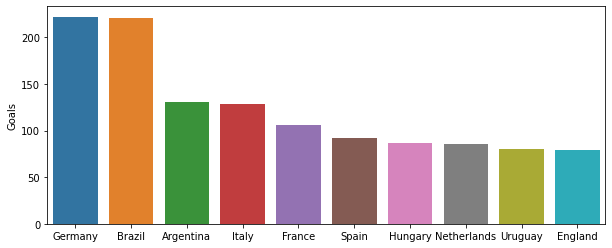

In [49]:
top_10 = goal_per_country[:10]

plt.figure(figsize=(10,4))
sns.barplot(data=top_10, x=top_10.index, y = "Goals")
plt.show()